# ASSIGNMENT-3

## 21BCE9841 

## 1) Importing necessary libraries 

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load dataset 

In [208]:
dataset = pd.read_csv("C:\Internship\self\Titanic-Dataset.csv")

In [209]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
dataset.shape

(891, 12)

In [211]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [213]:
corr = dataset.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


As PassengerId,Name,Ticket and Cabin do not affect in predicting Survived or not.Let's drop them. 

In [262]:
df = dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [263]:
df.shape

(891, 8)

## 3) Handling missing values

In [286]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [287]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [288]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [289]:
df["Age"].isnull().any()

False

In [290]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [291]:
print(df["Embarked"].isnull().any())

False


In [292]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

## 4) Data Visualization 

In [222]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

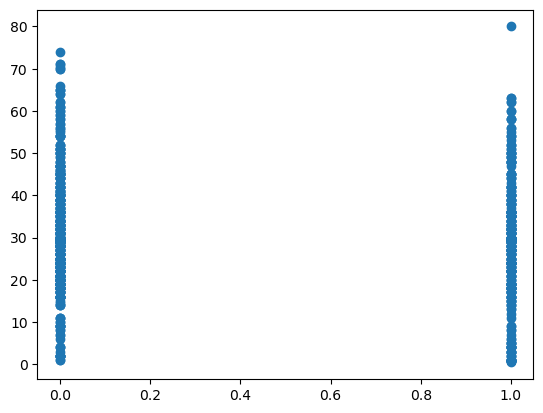

In [223]:
plt.scatter(df["Survived"],df["Age"])

In [224]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

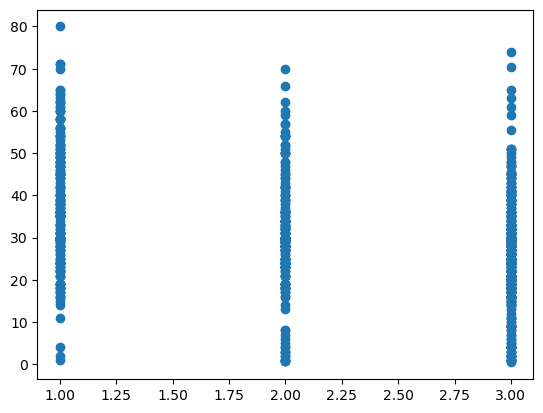

In [225]:
plt.scatter(df["Pclass"],df["Age"])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

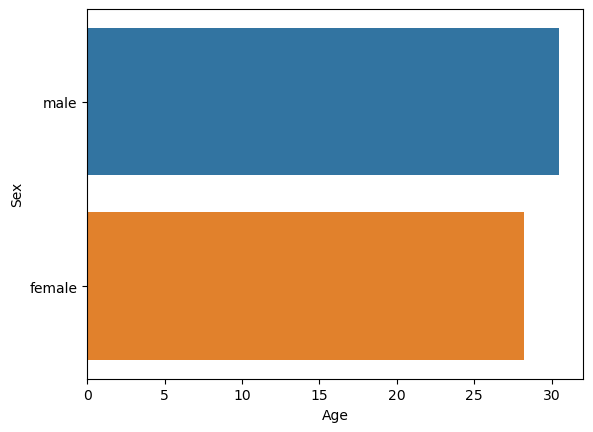

In [226]:
sns.barplot(x=df["Age"],y=df["Sex"],ci=0)

In [227]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

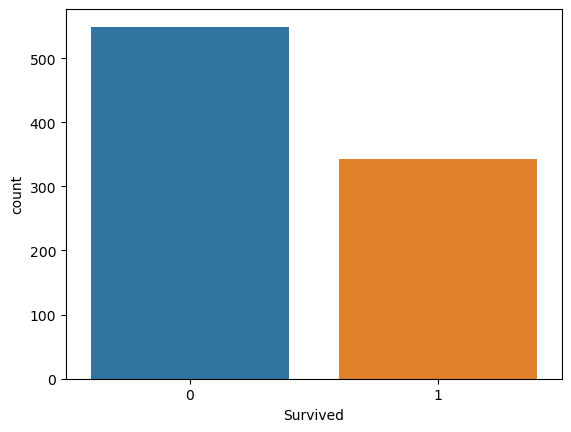

In [228]:
sns.countplot(x="Survived",data=df)

Text(0.5, 1.0, 'Number of survivors with respect to sex')

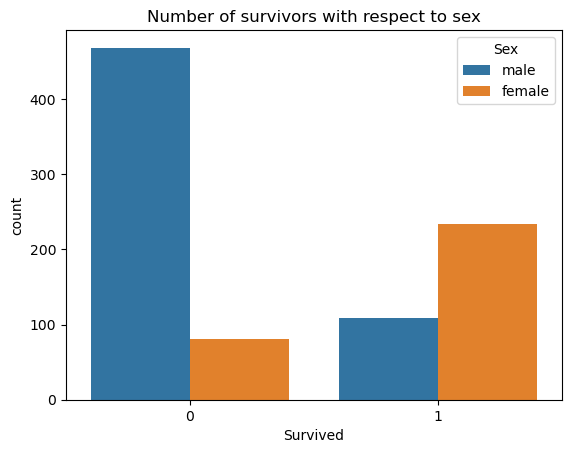

In [229]:
sns.countplot(x="Survived",hue="Sex",data=df)
plt.title("Number of survivors with respect to sex")

This graph shows that women more likely survived than men.

Text(0.5, 1.0, 'Number of survivors with respect to ticket class')

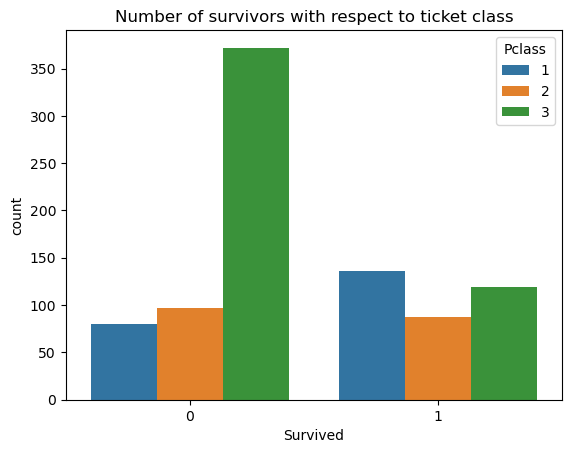

In [230]:
sns.countplot(x="Survived",hue="Pclass",data=df)
plt.title("Number of survivors with respect to ticket class")

The above plot shows that ticket 3 class people have not survived a lot.

In [231]:
corr = df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

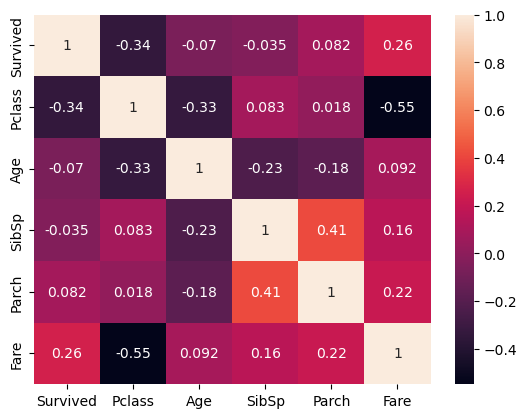

In [232]:
sns.heatmap(corr,annot=True)

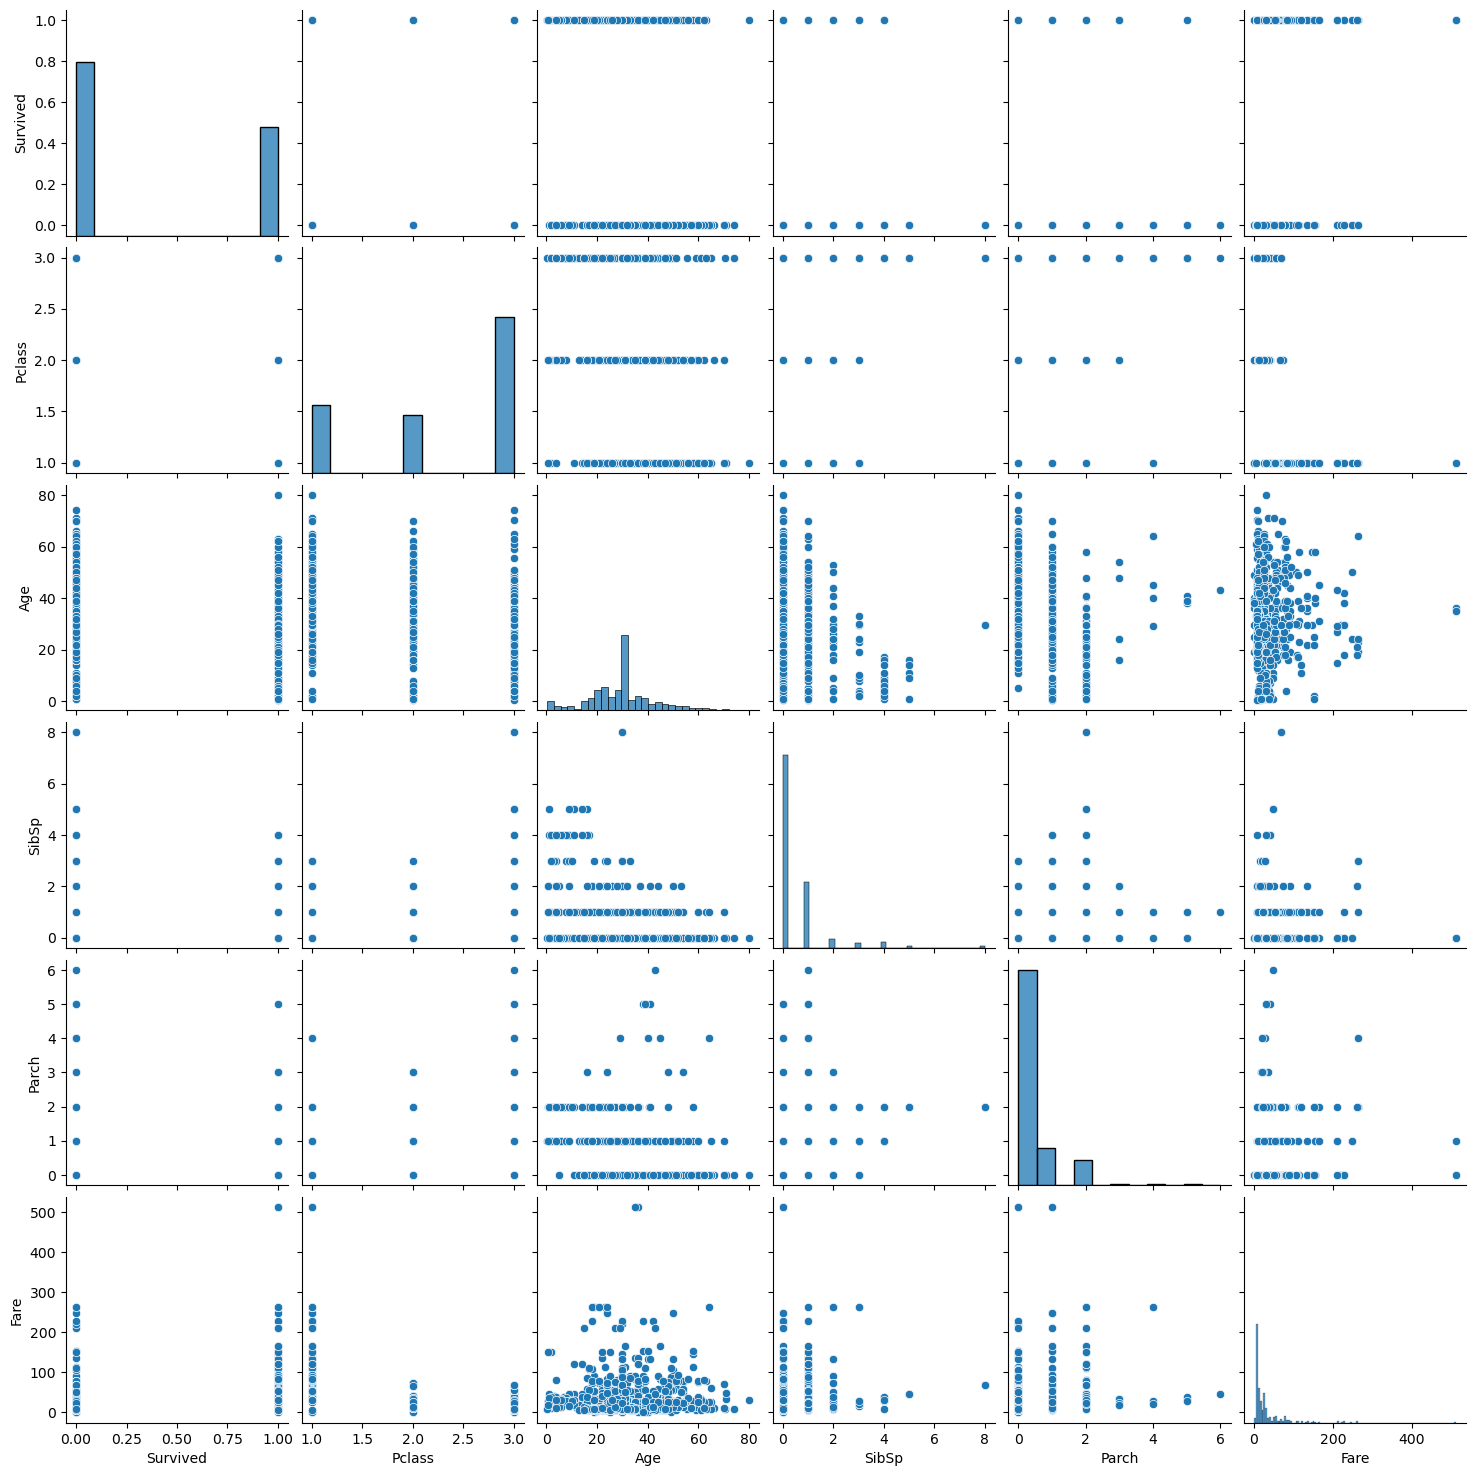

In [233]:
sns.pairplot(df)

## 5.Outlier detection 

In [234]:
import warnings
warnings.simplefilter("ignore")

<AxesSubplot:xlabel='Pclass'>

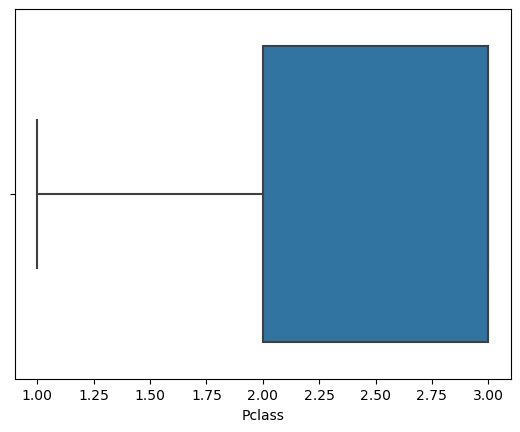

In [264]:
sns.boxplot(df["Pclass"])

No outliers in Pclass column

<AxesSubplot:xlabel='Age'>

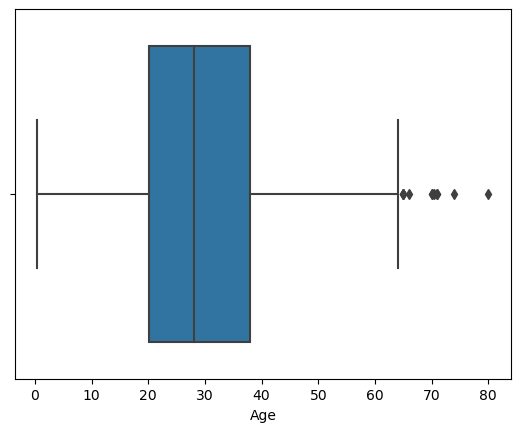

In [265]:
sns.boxplot(df["Age"])

There are outliers in age column.Let's remove them

### Outlier replacement with median 

In [266]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)

In [267]:
print(q1,q3)

20.125 38.0


In [268]:
IQR = q3 - q1
IQR

17.875

In [269]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

In [270]:
df["Age"].median()

28.0

In [271]:
df["Age"] = np.where(df["Age"] > upper_limit,28,df["Age"])

<AxesSubplot:xlabel='Age'>

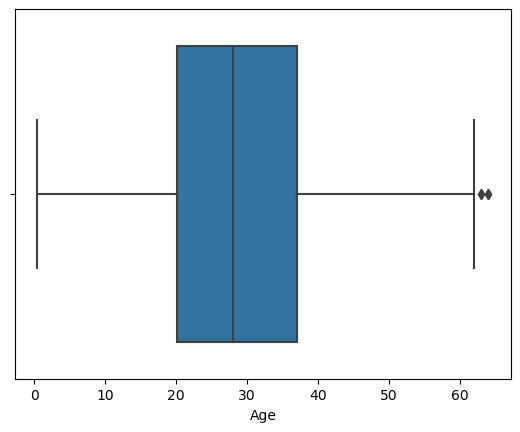

In [272]:
sns.boxplot(df["Age"])

Now, There are no outliers

<AxesSubplot:xlabel='Fare'>

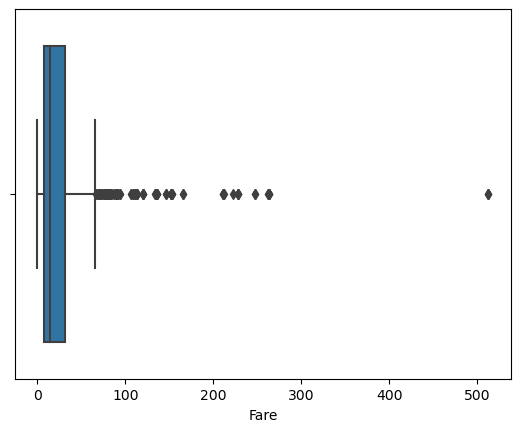

In [314]:
sns.boxplot(df["Fare"])

There are outliers in fare column.Let's remove them

In [315]:
df["Fare"].mean()

32.2042079685746

In [316]:
df["Fare"] = np.where(df["Fare"] > upper_limit,32,df["Fare"])

<AxesSubplot:xlabel='Fare'>

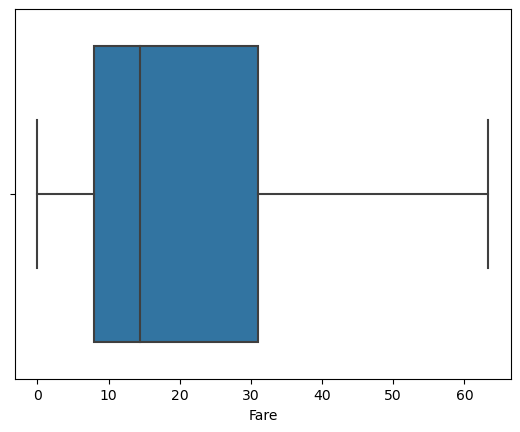

In [317]:
sns.boxplot(df["Fare"])

Now,there are no outliers

## 6.Splitting Dependent and Independent variables 

In [302]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [303]:
# Independent variables should be a 2d array or dataframe
X = df.iloc[:,1:9]

In [304]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [305]:
# dependent variable is 1d array or series
y = df["Survived"]

In [306]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 7.Feature Encoding 

In [307]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [308]:
from sklearn.preprocessing import LabelEncoder

In [309]:
le = LabelEncoder()

In [310]:
X["Sex"] = le.fit_transform(X["Sex"])
X["Embarked"] = le.fit_transform(X["Embarked"])

In [311]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [312]:
mapping = dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

## 8.Feature Scaling

In [326]:
from sklearn.preprocessing import MinMaxScaler

In [327]:
ms = MinMaxScaler()

In [329]:
X_scaled = pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [330]:
X_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.339415,0.125,0.0,0.014151,1.0
1,0.0,0.0,0.591066,0.125,0.0,0.139136,0.0
2,1.0,0.0,0.402328,0.000,0.0,0.015469,1.0
3,0.0,0.0,0.543882,0.125,0.0,0.103644,1.0
4,1.0,1.0,0.543882,0.000,0.0,0.015713,1.0


## 9.Splitting Data into Train and Test 

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [334]:
df.shape

(891, 8)

In [335]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)
